<a href="https://colab.research.google.com/github/dariabokareva/datascience/blob/master/neural-networks/nlp/imdb/dl_nlp_imdb_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Определение тональности текста отзывов на фильмы IMDB с помощью сети LSTM

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [2]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17473536/17464789 [==============================] - 1s 0us/step


## Подготовка данных для обучения

In [4]:
maxlen = 200

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [7]:
x_train[5000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         13,  104,   14, 2856,   77,    6,  542,   20,    5,   49,    7,
         94,  531,   26,  608,   21,   11,  226,   45,    6,  503,   20,
        172,   44,    4,  114,  531,   26,  608,   21,   12,   47,  450,
       1512,    5,    2,   15,  152,  179,  763,   56,  116,    9,  669,
        608,  207,  110,  433,    7,   14,   99,   10,   10,    4,  454,
        732,    4,  651,   19, 1880, 1953,   11,    4, 2092,  231,  646,
         21,  484, 1744, 2980,  143,   49,  392,   

## Создание нейронной сети

In [33]:
model = Sequential()
model.add(Embedding(max_words, 16, input_length=maxlen))
# model.add(LSTM(32, return_sequences=True)) # recurrent_dropout = 0.2))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [35]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 29s 13ms/step - loss: 0.5119 - accuracy: 0.7451 - val_loss: 0.3492 - val_accuracy: 0.8588
Epoch 2/15
176/176 [==============================] - 2s 11ms/step - loss: 0.2633 - accuracy: 0.8984 - val_loss: 0.3143 - val_accuracy: 0.8728
Epoch 3/15
176/176 [==============================] - 2s 10ms/step - loss: 0.1961 - accuracy: 0.9277 - val_loss: 0.3241 - val_accuracy: 0.8780
Epoch 4/15
176/176 [==============================] - 2s 11ms/step - loss: 0.1603 - accuracy: 0.9422 - val_loss: 0.3280 - val_accuracy: 0.8704
Epoch 5/15
176/176 [==============================] - 2s 10ms/step - loss: 0.1281 - accuracy: 0.9560 - val_loss: 0.3764 - val_accuracy: 0.8616
Epoch 6/15
176/176 [==============================] - 2s 11ms/step - loss: 0.1106 - accuracy: 0.9636 - val_loss: 0.4006 - val_accuracy: 0.8668
Epoch 7/15
176/176 [==============================] - 2s 10ms/step - loss: 0.0870 - accuracy: 0.9731 - val_loss: 0.4268 - val_accuracy: 0.864

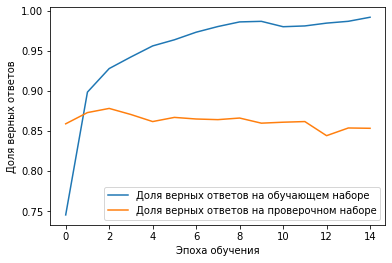

In [36]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [37]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 4s 5ms/step - loss: 0.6248 - accuracy: 0.8386
